In [63]:
import numpy as np

# 讀取 input.data
data = np.loadtxt('./data/input.data')

print(data.shape)
print(data[:5])

X_train = data[:, 0].reshape(-1, 1)  # 特徵
y_train = data[:, 1].reshape(-1, 1)   # 標籤



(34, 2)
[[-50.18038796   1.77474681]
 [-48.33784599   1.13053693]
 [-43.0202886   -2.47591107]
 [-41.29017074  -0.66589532]
 [-38.06586017  -0.47291983]]


In [49]:
# import pandas as pd

# X_train = pd.read_csv('./data/X_train.csv', header=None)
# X_test = pd.read_csv('./data/X_test.csv', header=None)
# y_train = pd.read_csv('./data/Y_train.csv', header=None)
# y_test = pd.read_csv('./data/Y_test.csv', header=None)

# print("X_train shape: ",X_train.shape)
# print("X_test shape: ",X_test.shape)
# print("y_train shape: ",y_train.shape)
# print("y_test shape: ",y_test.shape)


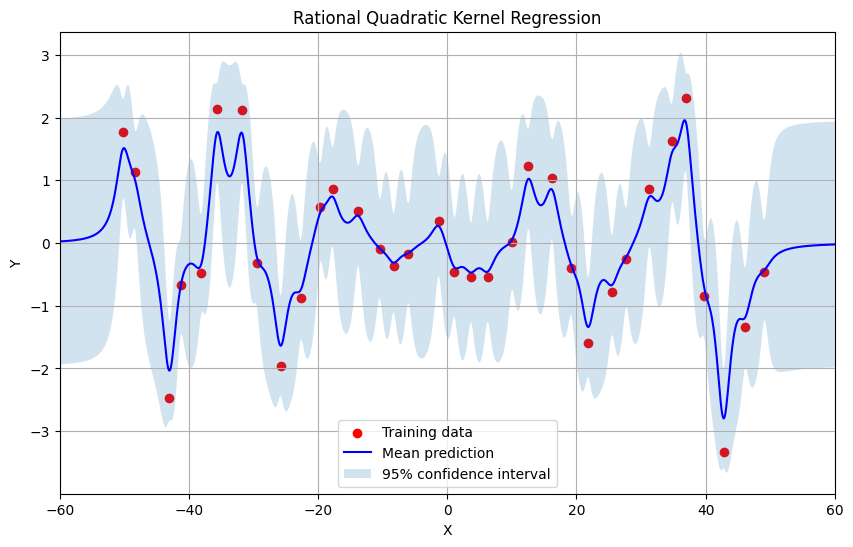

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Rational Quadratic kernel 定義
def rational_quadratic_kernel(X1, X2, length_scale=1.0, alpha=1.0, variance=1.0):
    sqdist = np.sum(X1**2, axis=1).reshape(-1,1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return variance * (1 + sqdist / (2 * alpha * length_scale**2)) ** (-alpha)

# Gaussian Process Regression 函數
def gaussian_process(X_train, y_train, X_test, length_scale=1.0, alpha=1.0, variance=1.0, noise=1e-10):
    # 確保輸入格式正確
    X_train = np.asarray(X_train).reshape(-1, 1)
    y_train = np.asarray(y_train).ravel()
    X_test = np.asarray(X_test).reshape(-1, 1)

    # 計算核矩陣
    K = rational_quadratic_kernel(X_train, X_train, length_scale, alpha, variance) + noise * np.eye(len(X_train))
    K_s = rational_quadratic_kernel(X_train, X_test, length_scale, alpha, variance)
    K_ss = rational_quadratic_kernel(X_test, X_test, length_scale, alpha, variance)  # 不加 noise

    K_inv = np.linalg.inv(K)

    # 計算後驗均值與共變異數
    mu = K_s.T @ K_inv @ y_train
    cov = K_ss - K_s.T @ K_inv @ K_s

    return mu.ravel(), cov


# 超參數設定
length_scale = 1.0
alpha = 1.0
variance = 1.0
noise = 1/5

# 要預測的位置
X_pred = np.linspace(-60, 60, 1000).reshape(-1, 1)

# 執行 GPR
mu, cov = gaussian_process(X_train, y_train, X_pred,
                           length_scale=length_scale, alpha=alpha,
                           variance=variance, noise=noise)

# 繪圖
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.plot(X_pred, mu, color='blue', label='Mean prediction')
plt.fill_between(X_pred.ravel(),
                 mu - 1.96 * np.sqrt(np.diag(cov)),
                 mu + 1.96 * np.sqrt(np.diag(cov)),
                 alpha=0.2, label='95% confidence interval')
plt.title('Rational Quadratic Kernel Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-60, 60)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
X_train
y_train

array([ 0.7568025 , -0.14112001, -0.90929743, -0.84147098,  0.        ,
        0.84147098])